# IMDB Dataset

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

tfk = tf.keras
tfkl = tfk.layers 
tfd = tfp.distributions
tfpl = tfp.layers

print("Tensorflow Version: %s" % tf.__version__)
print("Tensorflow Probability Version: %s" % tfp.__version__)

if tf.test.gpu_device_name() != '/device:GPU:0':
    print('GPU device not found. Using CPU')
else:
    print('Found GPU: {}'.format(tf.test.gpu_device_name()))

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


In [20]:
# load commons and models module
import os
import sys
import importlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import commons as cm
importlib.reload(cm)

<module 'commons' from 'D:\\Tom\\Documents\\gitworkspace\\master\\ml-probability\\bayesian_nlp\\commons.py'>

In [11]:
# load the imdb datasets without word length restrictions
(x_train, y_train), (x_test, y_test), (x_validation, y_validation) = cm.load_imdb()
word_index = cm.WordIndex(embedding_dim=50)
print(x_train[0], y_train[0])

[1, 13, 28, 332, 4, 274, 5, 13, 215, 135, 15, 14, 20, 2677, 283, 8, 812, 13, 104, 14, 9, 4, 454, 7, 4, 1987, 3106, 11, 4, 172, 512, 7, 2167, 10343, 5335, 408, 35, 321, 239, 17, 4, 485, 5, 8364, 7932, 408, 35, 321, 696, 284, 17, 4, 375, 1312, 3608, 13, 28, 110, 14, 20, 33, 222, 1453, 5, 13, 104, 15, 13, 244, 170, 8, 818, 199, 4, 274, 5, 4, 20, 18, 61, 1594, 4, 836, 43, 941, 1430, 56, 8, 4, 7754, 130, 4, 1009, 25, 80, 115, 67, 582, 48, 25, 40, 102, 40, 4084, 5, 4, 2059, 4, 5572, 80, 30, 6, 356, 18699, 82, 51, 9, 221, 9, 4, 156, 11, 4, 20, 25, 62, 24, 2537, 98, 48, 25, 122, 24, 332, 4, 898, 4, 522, 1516, 20205, 9, 87, 17, 4, 2153, 167, 5, 1808, 6649, 9, 321, 17, 4, 3852, 82, 50, 9, 5355, 13162, 37, 9, 2184, 21, 87] 1


Threshold: 1000 -> 171/50000 (0.36%) are not under the threshold
mean: 234
0.00 Quantile: 7 
0.25 Quantile: 129 
0.50 Quantile: 176 
0.75 Quantile: 285 
0.95 Quantile: 598 
1.00 Quantile: 2494 


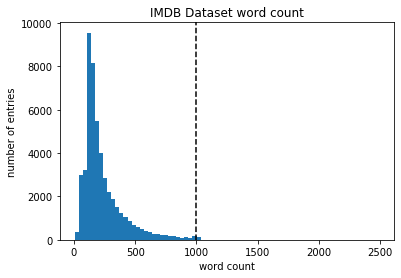

In [21]:
x_imdb = [*x_train, *x_test, *x_validation]
word_counts = [len(n) for n in x_imdb]
threshold = 1000
over_threshold_n = np.sum(np.array(word_counts) > threshold)

print("Threshold: %i -> %i/%i (%.2f%%) are not under the threshold" % (threshold, 
                                                                       over_threshold_n, 
                                                                       len(x_imdb), 
                                                                       100 * over_threshold_n / len([*x_train, *x_test])))

print("mean: %i" % np.mean(word_counts))
for q in [0, 0.25, 0.5, 0.75, 0.95, 1.0]:
    print("%.2f Quantile: %i " % (q, np.quantile(word_counts, q=q)))

fig, ax = plt.subplots()
plt.hist(word_counts, bins=75)
plt.axvline(x=threshold, color="black", linestyle="--")
plt.xlabel("word count")
plt.ylabel("number of entries")
plt.title("IMDB Dataset word count")
plt.savefig("D:/google drive/haw/master/mastertheisis/hauptprojekt/dataset/imdb_word_count.pdf")
plt.show()

In [13]:
# parsed sentence
print(word_index.vec2sentence(x_train[0]))

<START> i have read the book and i must say that this movie stays true to form i think this is the beginning of the psychological thrillers in the same genre of psycho cristina raines gives an excellent performance as the lead and burgess meredith gives an excellent supporting actor as the next door neighbor i have seen this movie at least twice and i think that i am going to buy both the book and the movie for my collection the suspense just keeps building up to the climatic end the twist you will never see coming if you like movies like signs and the village the sentinel will be a classic prelude also what is interesting is the actors in the movie you would not recognize them if you did not read the credits the late jerry orbach is great as the commercial director and jeff goldblum is excellent as the photographer also there is beverly d'angelo who is underrated but great
